In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [23]:
import scipy.stats as stats

In [3]:
airport_df1 = pd.read_csv("C:/Data/airport_final.csv")

In [4]:
airport_df1.head()

,Unnamed: 0,ID,total,Equipment,Airport_Name,City,Country
0,1,100,18,CRJ,Ottawa Macdonald-Cartier International Airport,Ottawa,Canada
1,2,106,4,PAG,Port Menier Airport,Port Menier,Canada
2,3,108,2,DH1,Prince Rupert Airport,Prince Pupert,Canada
3,4,108,2,DH3,Prince Rupert Airport,Prince Pupert,Canada
4,5,109,4,J31,Fort Chipewyan Airport,Fort Chipewyan,Canada


In [5]:
airport_df1 = airport_df1.drop(['Unnamed: 0'], axis=1)

In [6]:
airport_df1.head()

,ID,total,Equipment,Airport_Name,City,Country
0,100,18,CRJ,Ottawa Macdonald-Cartier International Airport,Ottawa,Canada
1,106,4,PAG,Port Menier Airport,Port Menier,Canada
2,108,2,DH1,Prince Rupert Airport,Prince Pupert,Canada
3,108,2,DH3,Prince Rupert Airport,Prince Pupert,Canada
4,109,4,J31,Fort Chipewyan Airport,Fort Chipewyan,Canada


In [7]:
airport_df2 = pd.read_csv("https://raw.githubusercontent.com/brian-cuny/620project1/master/calculations_international.csv")

In [8]:
airport_df2.head()

,ID,Airport,Country,Centrality,Closeness,Eigenvector,Betweenness,International
0,21,Sault Ste Marie,Canada,2,0.231846,0.007420,0.000000,False
1,24,St Anthony,Canada,2,0.227315,0.007676,0.003530,False
2,27,Baie Comeau,Canada,2,0.224873,0.006324,0.000000,False
3,28,Bagotville,Canada,3,0.266357,0.023518,0.004414,False
4,29,Baker Lake,Canada,4,0.232877,0.005315,0.001829,False


In [9]:
airport_df3 = pd.merge(airport_df1, airport_df2, on='ID')

In [10]:
airport_df3.head()

,ID,total,Equipment,Airport_Name,City,Country_x,Airport,Country_y,Centrality,Closeness,Eigenvector,Betweenness,International
0,100,18,CRJ,Ottawa Macdonald-Cartier International Airport,Ottawa,Canada,Ottawa Macdonald Cartier Intl,Canada,15,0.344337,0.188821,0.117226,True
1,108,2,DH1,Prince Rupert Airport,Prince Pupert,Canada,Prince Rupert,Canada,2,0.252541,0.023661,0.000000,False
2,108,2,DH3,Prince Rupert Airport,Prince Pupert,Canada,Prince Rupert,Canada,2,0.252541,0.023661,0.000000,False
3,109,4,J31,Fort Chipewyan Airport,Fort Chipewyan,Canada,Fort Chipewyan,Canada,2,0.224632,0.008939,0.000019,False
4,111,8,DH1,Quebec Jean Lesage International Airport,Quebec,Canada,Quebec Jean Lesage Intl,Canada,10,0.289167,0.058400,0.053029,False


In [11]:
equipment_summary = airport_df3['Equipment'].value_counts()

In [12]:
equipment_summary.head()

BEH    34
DHT    28
DH8    26
DH1    20
AT4    18
Name: Equipment, dtype: int64

In [16]:
equipment_summary

BEH            34
DHT            28
DH8            26
DH1            20
AT4            18
DH4            12
SWM            12
738            10
73W            10
BE1             8
BNI             7
J32             6
SF3             5
SFB             4
CRJ             4
DH3             4
J31             4
BET             3
73H             3
319             3
AT7             3
73M             3
PL2             3
PL2 BEH         2
D38             2
737             2
320             2
DHT DH8         2
BEH PL2         2
J41             2
F70             2
73W 736         2
DH8 BET         1
DH3 CRJ         1
DHT BET         1
DH8 73M         1
ER4 ERD         1
777             1
73C             1
CR7             1
BEC             1
DHL             1
75W             1
AT4 AT7         1
PL2 J32         1
ER4             1
D38 BEH DH3     1
BE1 SF3         1
ERJ             1
73M 733         1
333             1
S76             1
BET DH8         1
SFB DH1         1
PAG             1
DHP       

In [17]:
#Restrict to only those equipment with 10 or more rows of data
equipment_rev = ['BEH','DHT','DH8','DH1','AT4','DH4','SWM','738','73W']

In [19]:
airport_df4 = airport_df3[airport_df3.Equipment.isin(equipment_rev)]

In [20]:
airport_df4.head()

,ID,total,Equipment,Airport_Name,City,Country_x,Airport,Country_y,Centrality,Closeness,Eigenvector,Betweenness,International
1,108,2,DH1,Prince Rupert Airport,Prince Pupert,Canada,Prince Rupert,Canada,2,0.252541,0.023661,0.000000,False
4,111,8,DH1,Quebec Jean Lesage International Airport,Quebec,Canada,Quebec Jean Lesage Intl,Canada,10,0.289167,0.058400,0.053029,False
5,115,6,SWM,Kenora Airport,Kenora,Canada,Kenora,Canada,3,0.254692,0.014976,0.002629,False
6,117,6,73W,Greater Moncton International Airport,Moncton,Canada,Greater Moncton Intl,Canada,2,0.272955,0.043702,0.000000,False
7,119,6,BEH,Comox Airport,Comox,Canada,Comox,Canada,4,0.266697,0.068534,0.000683,False


In [36]:
airport_hist = airport_df4['Eigenvector'].hist(by=airport_df3['Equipment'])

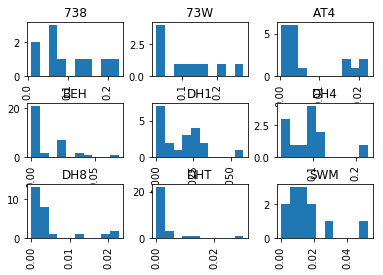

In [37]:
plt.show()

In [35]:
airport_df4.groupby('Equipment')['Eigenvector'].mean()

Equipment
738    0.101597
73W    0.113216
AT4    0.007396
BEH    0.012623
DH1    0.016030
DH4    0.090312
DH8    0.004547
DHT    0.002965
SWM    0.015667
Name: Eigenvector, dtype: float64

In [21]:
equip_groups = airport_df4.groupby('Equipment').groups

In [30]:
eigenvector=airport_df4['Eigenvector']

In [31]:
BEH=eigenvector[equip_groups['BEH']]
DHT=eigenvector[equip_groups['DHT']]
DH8=eigenvector[equip_groups['DH8']]
DH1=eigenvector[equip_groups['DH1']]
AT4=eigenvector[equip_groups['AT4']]
DH4=eigenvector[equip_groups['DH4']]
SWM=eigenvector[equip_groups['SWM']]
Seven38=eigenvector[equip_groups['738']]
Seven3W=eigenvector[equip_groups['73W']]

In [32]:
# Source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

stats.f_oneway(DHT,DH8,DH1,AT4,DH4,SWM,Seven38,Seven3W)

F_onewayResult(statistic=26.201802268517, pvalue=5.5968829003561464e-22)

In [47]:
# Given significance of test, assess all pairs of equipment to assess where the significant differences exist

# Source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

equip_pairs = []

for equip1 in range(8):
    for equip2  in range(equip1+1,9):
        equip_pairs.append((equipment_rev[equip1], equipment_rev[equip2]))

# Conduct t-test on each pair
for equip1, equip2 in equip_pairs: 
    print(equip1, equip2)
    print(stats.ttest_ind(eigenvector[equip_groups[equip1]], 
                          eigenvector[equip_groups[equip2]])) 

BEH DHT
Ttest_indResult(statistic=3.0173832154929396, pvalue=0.0037375940076780708)
BEH DH8
Ttest_indResult(statistic=2.419940045794978, pvalue=0.018677334653184465)
BEH DH1
Ttest_indResult(statistic=-0.76678068397081567, pvalue=0.44667927312333511)
BEH AT4
Ttest_indResult(statistic=1.3002854850303189, pvalue=0.19946505299522996)
BEH DH4
Ttest_indResult(statistic=-7.4918037668578306, pvalue=2.1884363820007873e-09)
BEH SWM
Ttest_indResult(statistic=-0.58419864271868527, pvalue=0.56207009658020202)
BEH 738
Ttest_indResult(statistic=-6.9848911797809858, pvalue=1.5276358947676799e-08)
BEH 73W
Ttest_indResult(statistic=-6.7439718761222203, pvalue=3.381450091583895e-08)
DHT DH8
Ttest_indResult(statistic=-0.91091437180971158, pvalue=0.36654392913885825)
DHT DH1
Ttest_indResult(statistic=-4.0711526350738305, pvalue=0.00018225474556513054)
DHT AT4
Ttest_indResult(statistic=-2.1192645919402113, pvalue=0.03974752987498531)
DHT DH4
Ttest_indResult(statistic=-8.3937491227136682, pvalue=3.4940138782

In [ ]:
#There are clearly significant differences between the centrality of airports' highest volume plane type, though it does not extend to all pairs of plane types.